# <font color='red'> CAMBIE NOMBRE DEL ARCHIVO

<font color='orange'> **ADVERTENCIA FINAL:** Este archivo debe llamarse "E10_[tu RUT].ipynb"
  
<font color='red'> **Ejemplo: E10_198765432.ipynb**

<font color='orange'> (el RUT debe ser sin puntos ni guion)

# Reconocimiento de Patrones
[Curso de Reconocimiento de Patrones](https://https://domingomery.ing.puc.cl/teaching/patrones/)

Departamento de Ciencia de la Computación

Universidad Catolica de Chile

(c) Domingo Mery, http://domingomery.ing.uc.cl



# IMPORTANTE:

En este código por favor:

*   No agregar celdas nuevas

*   No agregar librerías nuevas

*   <font color='red'> No hacer gráficas nuevas </font>



# Ejercicio 10: Clasificación usando Regresión Logística, Redes Neuronales, SVM y otros

En este ejercicio se realizará la clasificación de un problema de 3 clases y cuatro características usando los clasificadores vistos en clases.

* Training data: 3600 muestras, 1200 muestras por clase

* Testing data: 900 muestras, 300 muestras por clases

La distribución de las 3 clases en el espacio de características de dimensión $\mathcal{R}^4$ se muestra a continuación:



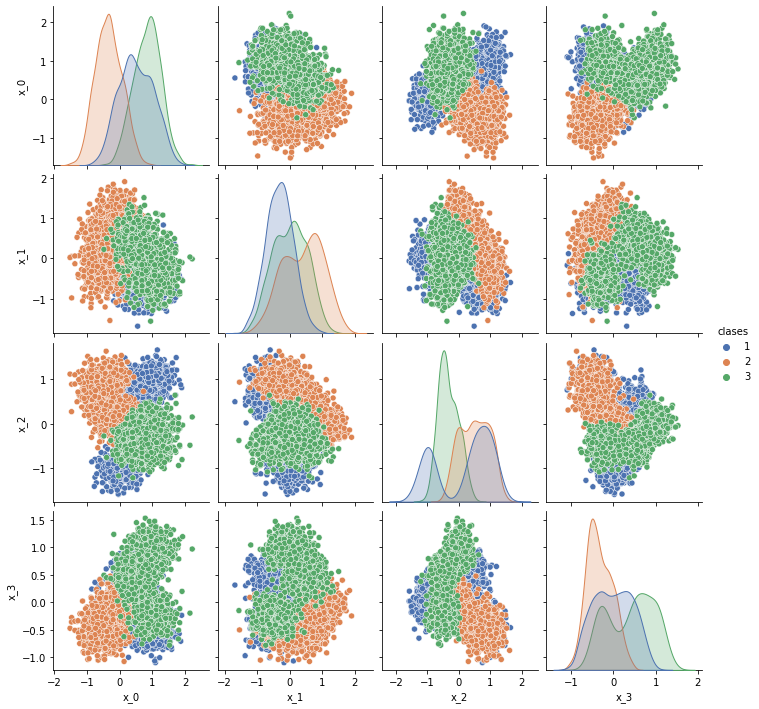

# Setup inicial

Liberías necesarias para que funcione el algoritmo.

## Instalación de Librerías


## Setup de librerías

In [1]:
#
# EJECUTAR ESTA CELDA SIN MODIFICARLA
#
import numpy as np
from   sklearn.neighbors             import NearestCentroid
from   sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from   sklearn.tree                  import DecisionTreeClassifier
from   sklearn.ensemble              import RandomForestClassifier
from   sklearn.neighbors             import KNeighborsClassifier
from   sklearn.linear_model          import LogisticRegression
from   sklearn.naive_bayes           import GaussianNB
from   sklearn.neural_network        import MLPClassifier
from   sklearn.svm                   import SVC
from   sklearn.metrics import confusion_matrix, accuracy_score
print('Librerías cargadas.')

Librerías cargadas.


## Funciones necesarias

In [2]:
#
# EJECUTAR ESTA CELDA SIN MODIFICARLA
#

def load_features(prefix):
    Xtrain  = np.load(prefix+'_Xtrain.npy')            # training samples
    Xtest = np.load(prefix+'_Xtest.npy')               # testing samples
    ytrain  = np.ravel(np.load(prefix+'_dtrain.npy'))  # training labels
    ytest = np.ravel(np.load(prefix+'_dtest.npy'))     # testing labels
    print('Training data: '+str(Xtrain.shape[0]) +' samples with '+str(Xtrain.shape[1]) +' features')
    print(' Testing data: '+str(Xtest.shape[0])+' samples with '+str(Xtest.shape[1])+' features')
    print('      Classes: '+str(int(np.min(ytrain)))+'...'+str(int(np.max(ytrain))))
    return Xtrain,ytrain,Xtest,ytest

def performance(ygt,ypred):
    # ygt - ground truth (ideal class), ypred - prediction
    acc = accuracy_score(ygt,ypred) 
    acc_st = "{:.2f}".format(acc*100)
    print('Accuracy = '+str(acc_st))
    C   = confusion_matrix(ygt,ypred) 
    print('Confusion Matrix:')
    print(C)
    return acc,C


# Carga de base de datos

La base de datos `G3x4` consiste en 3 clases, 4 características, 500 muestras por clase (400 para training y 100 para testing).

In [3]:
#
# EJECUTAR ESTA CELDA SIN MODIFICARLA
#

!wget https://www.dropbox.com/s/3w2rgwonp36ee3j/G3x4.zip
!unzip -qq G3x4.zip  
print('Base de datos G3x4 cargada.')

--2023-06-01 16:45:15--  https://www.dropbox.com/s/3w2rgwonp36ee3j/G3x4.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3w2rgwonp36ee3j/G3x4.zip [following]
--2023-06-01 16:45:15--  https://www.dropbox.com/s/raw/3w2rgwonp36ee3j/G3x4.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1fbce9b9ffe47971638106ccc1.dl.dropboxusercontent.com/cd/0/inline/B9J7RoJG8-GIU82_vD6Fu64_T9dDVTw46Vug3ZbzHa1eu7yJtBjPT0cGvwDf8U3G2Rks8VV5aJkIwd_rCkxXXFEZzxTFSZMuaLkPvs20ExhcGLgYwIvvF4dqhotHFWeI_rgCn6RumiI6fTrsVZtZBfOTCcR2R6QuwLb8E83dObpjuw/file# [following]
--2023-06-01 16:45:16--  https://uc1fbce9b9ffe47971638106ccc1.dl.dropboxusercontent.com/cd/0/inline/B9J7RoJG8-GIU82_vD6Fu64_T9dDVTw46Vug3ZbzHa1eu7yJtBjPT0cGvwDf8U3G2Rks8VV5aJkIwd_rCkxXXFEZz

# Definición de Training y Testing

En todos los experimentos usaremos 400 muestras por clase para training y el resto (100) para testing. Los datos ya vienen separados en Training/Testing.

In [4]:
#
# EJECUTAR ESTA CELDA SIN MODIFICARLA
#

data = 'G3x4' # <= puede ser 'G2','G3','G4','P2','F2' (ver explicación más arriba)
print('Cargando '+data+'...')

Xtrain,ytrain,Xtest,ytest   = load_features(data + '/' + data)   # load training and testing data


Cargando G3x4...
Training data: 3600 samples with 4 features
 Testing data: 900 samples with 4 features
      Classes: 1...3


# INICIO DE PREGUNTAS 

En este ejercicio hay 10 preguntas, en cada una de ellas se debe entrenar un clasificador específico:

* 1) Distancia mínima (dmin)

* 2) LDA

* 3) Naïve Bayes

* 4) Árbol de Decisión

* 5) Random Forest

* 6) Logistic Regression

* 7) Red Neuronal con 1 capa oculta

* 8) Red Neuornal con 2 capas ocultas

* 9) SVM lineal

* 10) SVM RBF

Para cada pregunta se deben seguir los siguientes 4 pasos (cada paso es una línea de código)

* Línea 1: Definir clasificador de `sklearn`

* Línea 2: Entrenar clasificador con los datos de Training

* Línea 3: Probar el clasificador en el Testing

* Línea 4: Evaluar desempeño, es decir calcular el Accuracy y la Matriz de Confusión en el Testing



# Pregunta EJEMPLO: KNN-15 

<font color='red'>IMPORTANTE: Estudiar muy bien este ejemplo.

<font color='red'>SON SOLO 4 LINEAS DE CODIGO

A continuación se muestra un ejemplo y la solución. Esta solución consiste en 4 pasos:

- 1) Definir clasificador (usar `clf = ...`)
- 2) Entrenar (usar `clf.fit ...`)
- 3) Clasificar el testing (usar `clf.predict ...`)
- 4) Evaluar el desempeño (usar `performance ...`)


<font color='orange'>La idea es que se haga lo mismo en las siguientes preguntas con el clasificador correspondiente y los mismos datos. En cada una de las preguntas debe escribirse sólo 4 líneas de código tal cual como se hace en este ejemplo para un clasificador KNN-15. 


<font color='red'>IMPORTANTE: El output debe ser las variables:

*  `acc_0` para el accuracy, y 

* `C_0`para la matriz de confusión.



In [5]:
# ESTUDIAR ESTA CELDA (EJECUTARLA SIN MODIFICARLA)
clf_knn = KNeighborsClassifier(n_neighbors=15) # Línea 1: Definir Clasificador
clf_knn.fit(Xtrain, ytrain)                    # Línea 2: Entrenar 
ypred = clf_knn.predict(Xtest)                 # Línea 3: Clasificar el Testing
acc_0,C_0 = performance(ytest,ypred)           # Línea 4: Evaluar desempeño

Accuracy = 98.33
Confusion Matrix:
[[296   2   2]
 [  2 295   3]
 [  5   1 294]]


# Pregunta 1: Distancia Mínima (dmin)

(1 punto)

Tal como se explicó en la "Pregunta EJEMPLO", escriba las cuatro líneas de código para entrenar y probar un clasificador de distancia mínima.

<font color='red'>IMPORTANTE: El output debe ser las variables:

*  `acc_1` para el accuracy, y 

* `C_1`para la matriz de confusión.

In [6]:
# INGRESE AQUI LAS 4 LINEAS DE CODIGO DE LA PREGUNTA 1
clf_dmin =NearestCentroid()                     # Línea 1: Definir Clasificador
clf_dmin.fit(Xtrain, ytrain)                    # Línea 2: Entrenar 
ypred = clf_dmin.predict(Xtest)                 # Línea 3: Clasificar el Testing
acc_1,C_1 = performance(ytest,ypred)           # Línea 4: Evaluar desempeño

Accuracy = 83.22
Confusion Matrix:
[[211   9  80]
 [  8 282  10]
 [ 43   1 256]]


# Pregunta 2: LDA

(1 punto)



Tal como se explicó en la "Pregunta EJEMPLO", escriba las cuatro líneas de código para entrenar y probar un clasificador LDA.


<font color='red'>IMPORTANTE: El output debe ser las variables:

*  `acc_2` para el accuracy, y 

* `C_2`para la matriz de confusión.


In [7]:
# INGRESE AQUI LAS 4 LINEAS DE CODIGO DE LA PREGUNTA 2
clf_lda =LinearDiscriminantAnalysis()          # Línea 1: Definir Clasificador
clf_lda.fit(Xtrain, ytrain)                    # Línea 2: Entrenar 
ypred = clf_lda.predict(Xtest)                 # Línea 3: Clasificar el Testing
acc_2,C_2 = performance(ytest,ypred)           # Línea 4: Evaluar desempeño

Accuracy = 85.67
Confusion Matrix:
[[235   9  56]
 [ 14 286   0]
 [ 49   1 250]]


# Pregunta 3: Naïve Bayes

(1 punto)

Tal como se explicó en la "Pregunta EJEMPLO", escriba las cuatro líneas de código para entrenar y probar un clasificador Naïve Bayes.


<font color='red'>IMPORTANTE: El output debe ser las variables:

*  `acc_3` para el accuracy, y 

* `C_3`para la matriz de confusión.



In [8]:
# INGRESE AQUI LAS 4 LINEAS DE CODIGO DE LA PREGUNTA 3
clf_naive = GaussianNB()                         # Línea 1: Definir Clasificador
clf_naive.fit(Xtrain, ytrain)                    # Línea 2: Entrenar 
ypred = clf_naive.predict(Xtest)                 # Línea 3: Clasificar el Testing
acc_3,C_3 = performance(ytest,ypred)             # Línea 4: Evaluar desempeño

Accuracy = 93.67
Confusion Matrix:
[[290   3   7]
 [  3 283  14]
 [ 30   0 270]]


# Pregunta 4: Árbol de Decisión

(1 punto)


Tal como se explicó en la "Pregunta EJEMPLO", escriba las cuatro líneas de código para entrenar y probar un clasificador basado en árbol de decisión con una profunidad `max_depth` de 4.

<font color='red'>IMPORTANTE: El output debe ser las variables:

*  `acc_4` para el accuracy, y 

* `C_4`para la matriz de confusión.



In [9]:
# INGRESE AQUI LAS 4 LINEAS DE CODIGO DE LA PREGUNTA 4
clf_des_tree = DecisionTreeClassifier(max_depth=4)  # Línea 1: Definir Clasificador
clf_des_tree.fit(Xtrain, ytrain)                    # Línea 2: Entrenar 
ypred = clf_des_tree.predict(Xtest)                 # Línea 3: Clasificar el Testing
acc_4,C_4 = performance(ytest,ypred)                # Línea 4: Evaluar desempeño

Accuracy = 93.56
Confusion Matrix:
[[278   2  20]
 [  7 278  15]
 [  5   9 286]]


# Pregunta 5: Random Forest

(1 punto)

Tal como se explicó en la "Pregunta EJEMPLO", escriba las cuatro líneas de código para entrenar y probar un clasificador basado en Random Forest con una profunidad `max_depth` de 8.


<font color='red'>IMPORTANTE: El output debe ser las variables:

*  `acc_5` para el accuracy, y 

* `C_5`para la matriz de confusión.



In [10]:
# INGRESE AQUI LAS 4 LINEAS DE CODIGO DE LA PREGUNTA 5
clf_rand_forest = RandomForestClassifier(max_depth=8)  # Línea 1: Definir Clasificador
clf_rand_forest.fit(Xtrain, ytrain)                    # Línea 2: Entrenar 
ypred = clf_rand_forest.predict(Xtest)                 # Línea 3: Clasificar el Testing
acc_5,C_5 = performance(ytest,ypred)                   # Línea 4: Evaluar desempeño

Accuracy = 97.78
Confusion Matrix:
[[293   1   6]
 [  3 293   4]
 [  3   3 294]]


# Pregunta 6: Logistic Regression

(1 punto)


Tal como se explicó en la "Pregunta EJEMPLO", escriba las cuatro líneas de código para entrenar y probar un clasificador de distancia mínima con los siguientes parámetros: 

* el paramétro `C` debe ser `0.16` y 

* el "solver" a usar debe ser `newton-cg`.


<font color='red'>IMPORTANTE: El output debe ser las variables:

*  `acc_6` para el accuracy, y 

* `C_6`para la matriz de confusión.



In [11]:
# INGRESE AQUI LAS 4 LINEAS DE CODIGO DE LA PREGUNTA 6
clf_logistic_regresion = LogisticRegression(C=0.16, solver="newton-cg")   # Línea 1: Definir Clasificador
clf_logistic_regresion.fit(Xtrain, ytrain)                                # Línea 2: Entrenar 
ypred = clf_logistic_regresion.predict(Xtest)                             # Línea 3: Clasificar el Testing
acc_6,C_6 = performance(ytest,ypred)                                      # Línea 4: Evaluar desempeño

Accuracy = 88.22
Confusion Matrix:
[[256   9  35]
 [  9 286   5]
 [ 46   2 252]]


# Pregunta 7: Red Neuronal con 1 capa oculta

(1 punto)

Tal como se explicó en la "Pregunta EJEMPLO", escriba las cuatro líneas de código para entrenar y probar un clasificador tipo Red Neuronal con los siguientes parámetros: 

* learning rate debe ser `0.005`

* número máximo de iteraciones debe ser 1250

* el "solver" a usar debe ser `sgd`

* la red debe tener sólo una capa oculta de 10 nodos

* el parámetro `random_state` debe ser `1`



<font color='red'>IMPORTANTE: El output debe ser las variables:

*  `acc_7` para el accuracy, y 

* `C_7`para la matriz de confusión.



In [12]:
# INGRESE AQUI LAS 4 LINEAS DE CODIGO DE LA PREGUNTA 7
clf_dl_one_layer = MLPClassifier(solver='sgd', learning_rate_init = 0.005, hidden_layer_sizes=10, 
                    random_state=1,max_iter=1250)                         # Línea 1: Definir Clasificador
clf_dl_one_layer.fit(Xtrain, ytrain)                                      # Línea 2: Entrenar 
ypred = clf_dl_one_layer.predict(Xtest)                                   # Línea 3: Clasificar el Testing
acc_7,C_7 = performance(ytest,ypred)                                      # Línea 4: Evaluar desempeño

Accuracy = 98.11
Confusion Matrix:
[[295   3   2]
 [  1 296   3]
 [  6   2 292]]


# Pregunta 8: Red Neuronal con 2 capa ocultas

(1 puntos)

Tal como se explicó en la "Pregunta EJEMPLO", escriba las cuatro líneas de código para entrenar y probar un clasificador tipo Red Neuronal con los siguientes parámetros: 

* learning rate debe ser `0.002`

* número máximo de iteraciones debe ser 800

* el "solver" a usar debe ser `adam`

* la red debe tener dos capas ocultas, la primera de 20 nodos, la segunda de 8 nodos

* el parámetro `random_state` debe ser `1`


<font color='red'>IMPORTANTE: El output debe ser las variables:

*  `acc_8` para el accuracy, y 

* `C_8`para la matriz de confusión.



In [13]:
# INGRESE AQUI LAS 4 LINEAS DE CODIGO DE LA PREGUNTA 8
clf_dl_two_layers = MLPClassifier(solver='adam', learning_rate_init = 0.002, hidden_layer_sizes=(20, 10), 
                    random_state=1,max_iter=800)                          # Línea 1: Definir Clasificador
clf_dl_two_layers.fit(Xtrain, ytrain)                                     # Línea 2: Entrenar 
ypred = clf_dl_two_layers.predict(Xtest)                                  # Línea 3: Clasificar el Testing
acc_8,C_8 = performance(ytest,ypred)                                      # Línea 4: Evaluar desempeño

Accuracy = 98.22
Confusion Matrix:
[[296   1   3]
 [  2 295   3]
 [  5   2 293]]


# Pregunta 9: SVM lineal

(1 puntos)

Tal como se explicó en la "Pregunta EJEMPLO", escriba las cuatro líneas de código para entrenar y probar un clasificador tipo SVM lineal con los siguientes parámetros: 

* el factor "gamma" debe  `0.2`

* el paramétro `C` debe ser `0.175`


<font color='red'>IMPORTANTE: El output debe ser las variables:

*  `acc_9` para el accuracy, y 

* `C_9`para la matriz de confusión.

In [14]:
# INGRESE AQUI LAS 4 LINEAS DE CODIGO DE LA PREGUNTA 9
clf_svm_linear = SVC(kernel = "linear", gamma=0.2, C=0.175)            # Línea 1: Definir Clasificador
clf_svm_linear.fit(Xtrain, ytrain)                                     # Línea 2: Entrenar 
ypred = clf_svm_linear.predict(Xtest)                                  # Línea 3: Clasificar el Testing
acc_9,C_9 = performance(ytest,ypred)                                   # Línea 4: Evaluar desempeño

Accuracy = 88.11
Confusion Matrix:
[[255   9  36]
 [ 13 286   1]
 [ 47   1 252]]


# Pregunta 10: SVM RBF

(1 puntos)

Tal como se explicó en la "Pregunta EJEMPLO", escriba las cuatro líneas de código para entrenar y probar un clasificador tipo SVM RBF con los siguientes parámetros: 

* el factor "gamma" debe  `0.6`

* el paramétro `C` debe ser `0.2`


<font color='red'>IMPORTANTE: El output debe ser las variables:

*  `acc_10` para el accuracy, y 

* `C_10`para la matriz de confusión.


In [15]:
# INGRESE AQUI LAS 4 LINEAS DE CODIGO DE LA PREGUNTA 10
clf_svm_rbf = SVC(kernel = "rbf", gamma=0.6, C=0.2)                 # Línea 1: Definir Clasificador
clf_svm_rbf.fit(Xtrain, ytrain)                                     # Línea 2: Entrenar 
ypred = clf_svm_rbf.predict(Xtest)                                  # Línea 3: Clasificar el Testing
acc_10,C_10 = performance(ytest,ypred)                                # Línea 4: Evaluar desempeño

Accuracy = 98.22
Confusion Matrix:
[[294   1   5]
 [  2 295   3]
 [  3   2 295]]


In [16]:
#
# EJECUTAR ESTA CELDA SIN MODIFICARLA
#

print('original: C = ',C_0[0,:] ,C_0[1,:] ,C_0[2,:], ' | acc =',"{:6.2f}%".format(acc_0*100) )
print(' P01 out: C = ',C_1[0,:] ,C_1[1,:] ,C_1[2,:], ' | acc =',"{:6.2f}%".format(acc_1*100) )
print(' P02 out: C = ',C_2[0,:] ,C_2[1,:] ,C_2[2,:], ' | acc =',"{:6.2f}%".format(acc_2*100) )
print(' P03 out: C = ',C_3[0,:] ,C_3[1,:] ,C_3[2,:], ' | acc =',"{:6.2f}%".format(acc_3*100) )
print(' P04 out: C = ',C_4[0,:] ,C_4[1,:] ,C_4[2,:], ' | acc =',"{:6.2f}%".format(acc_4*100) )
print(' P05 out: C = ',C_5[0,:] ,C_5[1,:] ,C_5[2,:], ' | acc =',"{:6.2f}%".format(acc_5*100) )
print(' P06 out: C = ',C_6[0,:] ,C_6[1,:] ,C_6[2,:], ' | acc =',"{:6.2f}%".format(acc_6*100) )
print(' P07 out: C = ',C_7[0,:] ,C_7[1,:] ,C_7[2,:], ' | acc =',"{:6.2f}%".format(acc_7*100) )
print(' P08 out: C = ',C_8[0,:] ,C_8[1,:] ,C_8[2,:], ' | acc =',"{:6.2f}%".format(acc_8*100) )
print(' P09 out: C = ',C_9[0,:] ,C_9[1,:] ,C_9[2,:], ' | acc =',"{:6.2f}%".format(acc_9*100) )
print(' P10 out: C = ',C_10[0,:],C_10[1,:],C_10[2,:],' | acc =',"{:6.2f}%".format(acc_10*100))


original: C =  [296   2   2] [  2 295   3] [  5   1 294]  | acc =  98.33%
 P01 out: C =  [211   9  80] [  8 282  10] [ 43   1 256]  | acc =  83.22%
 P02 out: C =  [235   9  56] [ 14 286   0] [ 49   1 250]  | acc =  85.67%
 P03 out: C =  [290   3   7] [  3 283  14] [ 30   0 270]  | acc =  93.67%
 P04 out: C =  [278   2  20] [  7 278  15] [  5   9 286]  | acc =  93.56%
 P05 out: C =  [293   1   6] [  3 293   4] [  3   3 294]  | acc =  97.78%
 P06 out: C =  [256   9  35] [  9 286   5] [ 46   2 252]  | acc =  88.22%
 P07 out: C =  [295   3   2] [  1 296   3] [  6   2 292]  | acc =  98.11%
 P08 out: C =  [296   1   3] [  2 295   3] [  5   2 293]  | acc =  98.22%
 P09 out: C =  [255   9  36] [ 13 286   1] [ 47   1 252]  | acc =  88.11%
 P10 out: C =  [294   1   5] [  2 295   3] [  3   2 295]  | acc =  98.22%


# VERIFICACION FINAL

<font color='red'> **ADVERTENCIA:** Este ejercicio será evaluado de la siguiente manera: si el código funciona y el resultado es correcto, la pregunta tendrá un 100% de la evaluación, en caso contrario 0%. Para asegurarse que el código se ejecute sin caídas seleccione la opción del menú:

1) <font color='orange'> 'Runtime' + 'Disconnect and delete runtime'

2) <font color='orange'> 'Run all'

<font color='red'> El código debería ejecutarse desde el inicio hasta el final sin problema alguno.

# PASO FINAL: Subir tarea

<font color='orange'> **ADVERTENCIA FINAL:** Este archivo, que debe llamarse "E10_[tu RUT].ipynb"
  
<font color='red'> **Ejemplo: E10_198765432.ipynb**

<font color='orange'> (el RUT debe ser sin puntos ni guion) y debe subirse a Canvas según la hora señalada para la actividad E10.